# **BT thực hành 6.3: Descriptive Statistics - Life of battery**


> Cập nhật: **07/2023**



---
## **Môi trường triển khai ứng dụng**
---

In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = ''

Mounted at /content/gdrive


In [ ]:
## Các thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

from numpy               import mean, median
from scipy               import stats

---
## **Yêu cầu 1:**
Tập tin **life_batteries.txt** lưu trữ số liệu điều tra tuổi thọ của pin laptop (Battery 1).
1. Tạo life_array từ nội dung tập tin.
2. Vẽ biểu đồ khối cho phân phối tần suất của life_array.
3. Tạo bảng phân phối tần suất theo các khoảng 120-129, 130-139, 140-149, 150-159, 160-169.
4. Vẽ biểu đồ khối cho phân phối tần suất theo các khoảng. Nhận xét các biểu đồ nêu trên.
5. Những thống kê cơ bản của life_array.
6. Tính độ nghiêng, độ nhọn và nhận xét kết quả
---


In [ ]:
## Mở tập tin dữ liệu
f = open(folder + '/Data/life_batteries.txt', 'r')

## Nội dung tập tin
content = f.read()
print(content)

130	145	126	146
164	130	132	152
145	129	133	155
140	127	139	137
131	126	145	148
125	132	126	126
126	135	131	129
147	136	129	136
156	146	130	146
132	142	132	132



In [ ]:
## 1. Tạo life_array từ nội dung tập tin
life = content.split() # hàm split() rút trích các terms trong chuỗi
f.close()

life = list(map(int, life))  # chuyển sang list()
life_array = np.array(life)
life_array

array([130, 145, 126, 146, 164, 130, 132, 152, 145, 129, 133, 155, 140,
       127, 139, 137, 131, 126, 145, 148, 125, 132, 126, 126, 126, 135,
       131, 129, 147, 136, 129, 136, 156, 146, 130, 146, 132, 142, 132,
       132])

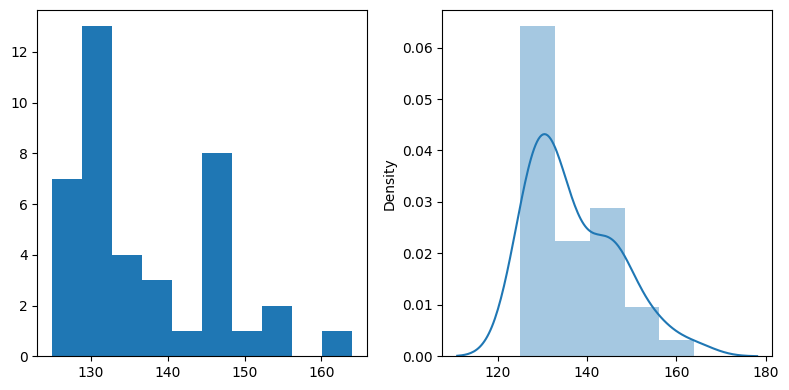

In [ ]:
## 2. Vẽ biểu đồ phân phối tần suất của life_array
plt.figure(figsize = (8, 4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(life_array)

# Distribution
plt.subplot(1, 2, 2)
sns.distplot(life_array)
plt.tight_layout()
plt.show()

In [ ]:
## 3. Tạo bảng phân phối tần suất theo các khoảng
freq = pd.Series()
freq['120-129'] = np.extract((life_array >= 120) & (life_array <= 129), life_array).size
freq['130-139'] = np.extract((life_array >= 130) & (life_array <= 139), life_array).size
freq['140-149'] = np.extract((life_array >= 140) & (life_array <= 149), life_array).size
freq['150-159'] = np.extract((life_array >= 150) & (life_array <= 159), life_array).size
freq['160-169'] = np.extract((life_array >= 160) & (life_array <= 169), life_array).size

freq

120-129    10
130-139    16
140-149    10
150-159     3
160-169     1
dtype: int64

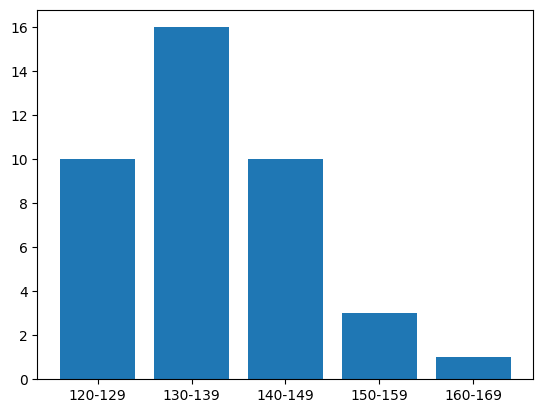

In [ ]:
## 4. Vẽ biểu đồ phân phối tần suất của các khoảng
plt.bar(freq.index, freq)
plt.show()

#### Nhận xét:
- Hầu hết dữ liệu tập trung trong khoảng 130, với một vài điểm dữ liệu vượt quá 150.
- Trọng tâm của dữ liệu là một 1 trong khoảng 130-139.

In [ ]:
## 5. Thống kê cơ bản trên dữ liệu
print('Mean   x_    =', mean(life_array))
print('MIN    x_min =', min(life_array))
print('MAX    x_max =', max(life_array))
print('Median x_med =', median(life_array))
x_mod = stats.mode(life_array)
print('Mode   x_mod =', x_mod[0][0])
print('       f(x)  =', x_mod[1][0]) # số lần

Mean   x_    = 136.85
MIN    x_min = 125
MAX    x_max = 164
Median x_med = 132.5
Mode   x_mod = 126
       f(x)  = 5


In [ ]:
## Tìm range
range_life = np.ptp(life_array)
range_life

39

In [ ]:
## Tìm phương sai
life_var = np.var(life_array)
life_var

93.4775

In [ ]:
## Tìm độ lệch chuẩn
std_life = np.std(life_array)
std_life

9.66837628560246

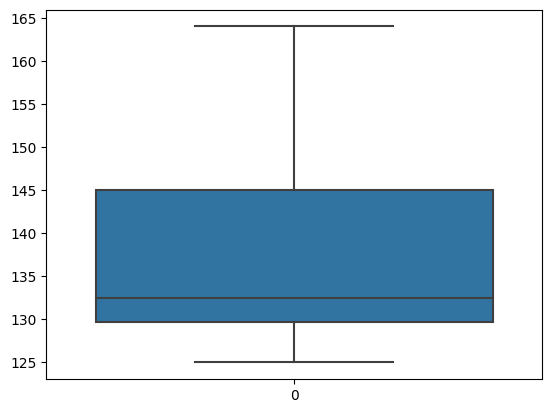

In [ ]:
## Vẽ boxplot
sns.boxplot(life_array)
plt.show()

In [ ]:
## Không có outlier

In [ ]:
## 6. Tính độ nghiêng, độ nhọn và nhận xét kết quả
skew_life = stats.skew(life_array)
skew_life

print('Mẫu dữ liệu lệch PHẢI') if (skew_life > 0) else print('Mẫu dữ liệu lệch TRÁI')

Mẫu dữ liệu lệch PHẢI


In [ ]:
kur_life = stats.kurtosis(life_array) # Fisher = True (default): kur - 3 (excess-kur)
kur_life

-0.07613238307755621

In [ ]:
kur_life = stats.kurtosis(life_array, fisher = False)
kur_life

2.923867616922444

---
## **Yêu cầu 2:**
Tập tin **life_batteries_2.txt** lưu trữ số liệu điều tra khác về tuổi thọ của pin laptop (Battery 2)
1. Tạo life2_array từ nội dung tập tin.
2. So sánh 2 nhóm pin (Battery 1 và Battery 2) theo histogram.
3. Tạo bảng phân phối tần suất của Battery 2 trong các khoảng 120-129, 130-139, 140-149, 150-159, 160-169.
4. Vẽ biểu đồ phân phối tần suất cho các khoảng.
5. So sánh hai nhóm mẫu dựa trên thống kê chung.
---


In [ ]:
## Mở tập tin dữ liệu
f = open(folder + '/Data/life_batteries_2.txt', 'r')

## Nội dung tập tin
content2 = f.read()
print(content2)

134	130	140	151
143	134	136	144
150	135	160	141
143	140	138	141
148	146	140	146
151	138	151	139
151	128	146	147
152	142	144	134
142	146	142	136
122	134	145	147


In [ ]:
## 1. Tạo life2_array từ nội dung tập tin
life2 = content2.split()
f.close()

life2 = list(map(int, life2))
life2_array = np.array(life2)
life2_array

array([134, 130, 140, 151, 143, 134, 136, 144, 150, 135, 160, 141, 143,
       140, 138, 141, 148, 146, 140, 146, 151, 138, 151, 139, 151, 128,
       146, 147, 152, 142, 144, 134, 142, 146, 142, 136, 122, 134, 145,
       147])

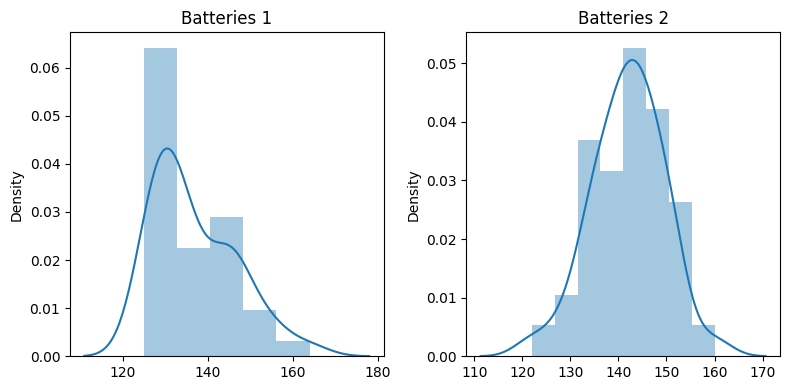

In [ ]:
## So sánh 2 nhóm pin (Battery 1 và Battery 2) theo histogram.
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot(life_array)
plt.title('Batteries 1')
plt.subplot(1, 2, 2)
sns.distplot(life2_array)
plt.title('Batteries 2')
plt.tight_layout()
plt.show()

- Dữ liệu Battery 2 tập trung trong khoảng 140.
- Mức độ biến thiên của Battery 2 ít hơn so với Battery 1.
- Nhìn chung, mẫu dữ liệu Battery 2 tốt hơn (trung bình cao hơn và biến thiên thấp hơn)

In [ ]:
## 3. Tạo bảng phân phối tần suất theo các khoảng
freq2 = pd.Series()
freq2['120-129'] = np.extract((life2_array >= 120) & (life2_array <= 129), life2_array).size
freq2['130-139'] = np.extract((life2_array >= 130) & (life2_array <= 139), life2_array).size
freq2['140-149'] = np.extract((life2_array >= 140) & (life2_array <= 149), life2_array).size
freq2['150-159'] = np.extract((life2_array >= 150) & (life2_array <= 159), life2_array).size
freq2['160-169'] = np.extract((life2_array >= 160) & (life2_array <= 169), life2_array).size

<BarContainer object of 5 artists>

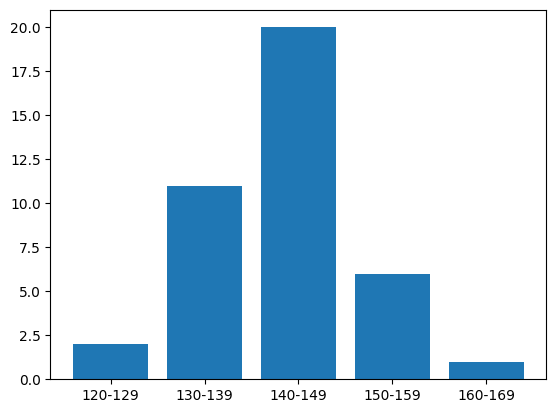

In [ ]:
## 4. Vẽ biểu đồ phân phối tần suất cho các khoảng.
plt.bar(freq2.index, freq2)

In [ ]:
## 5. So sánh hai nhóm mẫu dựa trên thống kê chung.

# Tạo dataframe kết nối 2 mẫu trên các khoảng
freq_df = pd.DataFrame({"batteries_1":freq, "batteries_2":freq2})
freq_df

,batteries_1,batteries_2
120-129,10,2
130-139,16,11
140-149,10,20
150-159,3,6
160-169,1,1


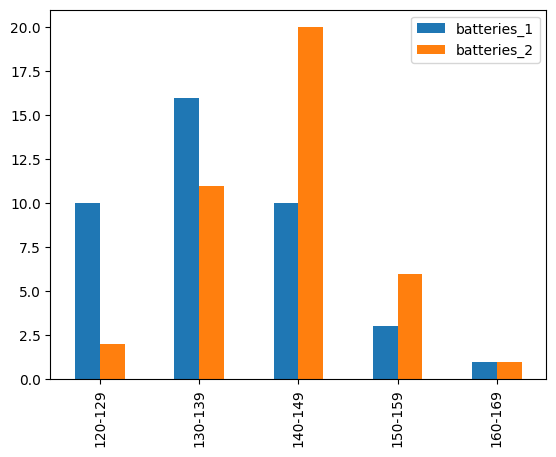

In [ ]:
# Vẽ biểu đồ so sánh
freq_df.plot.bar();

In [ ]:
# Thống kê trên mẫu Batteries 1
stats.describe(life_array)

DescribeResult(nobs=40, minmax=(125, 164), mean=136.85, variance=95.87435897435897, skewness=0.8455287049086152, kurtosis=-0.07613238307755621)

In [ ]:
# Thống kê trên mẫu Batteries 2
stats.describe(life2_array)

DescribeResult(nobs=40, minmax=(122, 160), mean=141.925, variance=55.19935897435897, skewness=-0.2510338974166527, kurtosis=0.3567028000549164)

#### Nhận xét:
- Batteries 2 có tuổi thọ trung bình cao hơn và phương sai nhỏ hơn Batteries 1.
- Batteries 1 có skewness > 0: phân phối lệch phải
- Batteries 2 có skewness < 0: phân phối lệch trái
- Batteries 1 có kurtosis < 0: phân bố này thấp hơn phân bố chuẩn
- Batteries 2 có kurtosis > 0: phân bố này cao hơn phân bố chuẩn

In [ ]:
## Tạo 2 boxplot trên cùng 1 biểu đồ (không chia các khoảng)
df = pd.DataFrame({"batteries_1":life_array, "batteries_2":life2_array})
df.head()

,batteries_1,batteries_2
0,130,134
1,145,130
2,126,140
3,146,151
4,164,143


In [ ]:
# Thống kê
df.describe()

,batteries_1,batteries_2
count,40.000000,40.000000
mean,136.850000,141.925000
std,9.791545,7.429627
min,125.000000,122.000000
25%,129.750000,137.500000
50%,132.500000,142.000000
75%,145.000000,146.250000
max,164.000000,160.000000


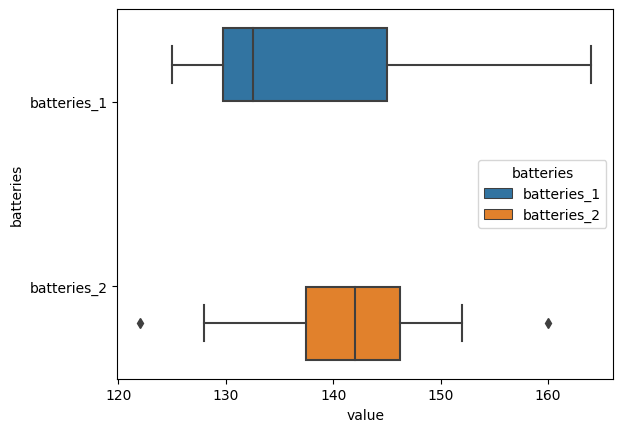

In [ ]:
## Trộn dữ liệu
dd = pd.melt(df, value_vars = ['batteries_1', 'batteries_2'], var_name = 'batteries')

# Vẽ boxplot cho 2 nhóm Batteries 1 và Batteries 2
sns.boxplot(y = 'batteries', x = 'value', data = dd, hue = 'batteries');

#### Nhận xét:
- Nhóm Batteries 1 không có outliers, nhóm Batteries 2 có outliers
- Phân phối Batteries 2 tập trung hơn phân phối Batteries 1
- Phạm vi của Batteries 2 ngắn hơn so với Batteries 1 (ít thay đổi hơn) và được lệch sang bên phải (trung bình cao hơn trung vị).